In [349]:
# 📊 Análisis Exploratorio de Datos (EDA)
#Este cuaderno contiene un análisis exploratorio del dataset `df_limpio.csv`, incluyendo 15 gráficos relevantes para entender su estructura, distribución y posibles patrones.


In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

df = pd.read_csv("df_limpio.csv", low_memory=False)
df["status_cancel"] = df["status"].apply(lambda x: 1 if "cancel" in x.lower() else 0)



import matplotlib.pyplot as plt
import seaborn as sns

# Paleta clara / pastel
PALETTE = sns.color_palette("pastel")

# Aplicación global
sns.set_theme(
    style="whitegrid",
    palette=PALETTE
)

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=PALETTE)

df.head()


,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,ratio_asistencia,ratio_cancelaciones_mes_respecto_reservas,zona_roja,estacion_estancia,estacion_reserva,antiguedad_hotel_en_dias,es_festivo,es_finde,city,status_cancel
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,1.000000,0.251273,1,invierno,otoño,2110,False,False,Donostia,0
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,1.000000,0.251273,1,invierno,invierno,2110,True,False,Donostia,0
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,0.333333,0.251273,1,invierno,otoño,2110,True,False,Donostia,0
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,0.500000,0.251273,1,invierno,otoño,2110,False,False,Donostia,0
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,1.000000,0.251273,1,invierno,otoño,2110,False,False,Donostia,0


In [351]:
df.columns


Index(['booked_at', 'checkin_time', 'checkout_time', 'lead_time',
       'lenght_of_stay', 'checkin_month', 'checkin_day', 'adult_count',
       'child_count', 'origin', 'travel_agency_name', 'requested_category',
       'requested_category_name', 'asset', 'asset_type', 'asset_opening_date',
       'available_units', 'business_segment', 'rate', 'rate_group_name',
       'rate_type', 'completed_entry_forms_count', 'all_entry_forms_completed',
       'returning_inhabitant', 'recurrence', 'libere_community',
       'bought_products', 'product_count', 'reservation_net_value',
       'total_adr', 'status', 'cancellation_reason', 'cancellation_lead_time',
       'ha_cancelado', 'momento_checkin', 'ratio_asistencia',
       'ratio_cancelaciones_mes_respecto_reservas', 'zona_roja',
       'estacion_estancia', 'estacion_reserva', 'antiguedad_hotel_en_dias',
       'es_festivo', 'es_finde', 'city', 'status_cancel'],
      dtype='object')

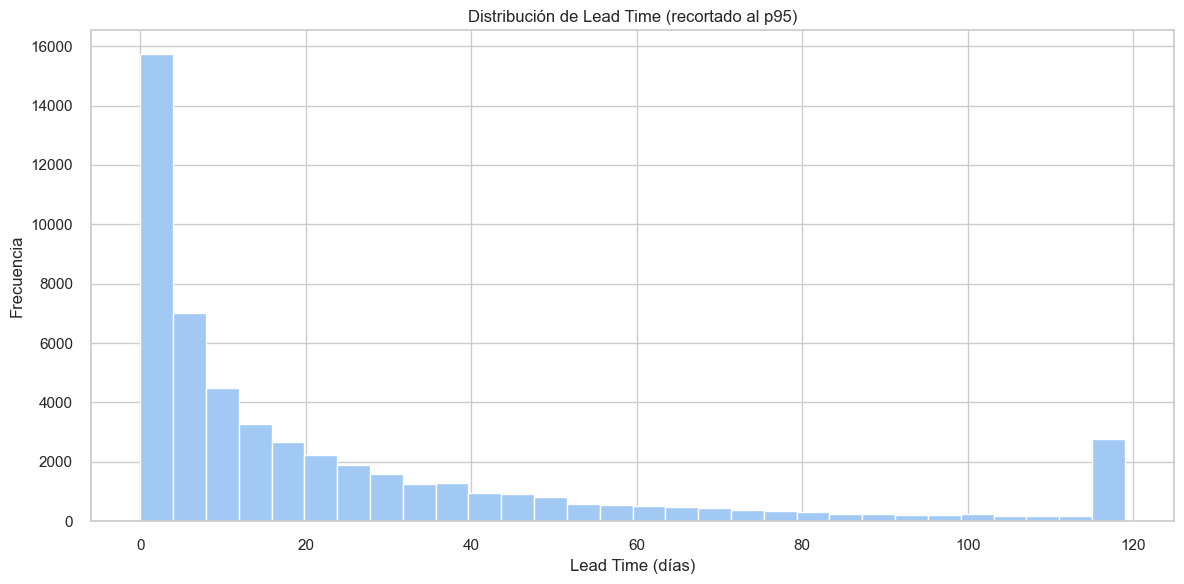

In [352]:
plt.figure(figsize=(12,6))

df["lead_time"].clip(0, df["lead_time"].quantile(0.95)).plot.hist(
    bins=30
)

plt.title("Distribución de Lead Time (recortado al p95)")
plt.xlabel("Lead Time (días)")
plt.ylabel("Frecuencia")
plt.tight_layout() 
plt.show()


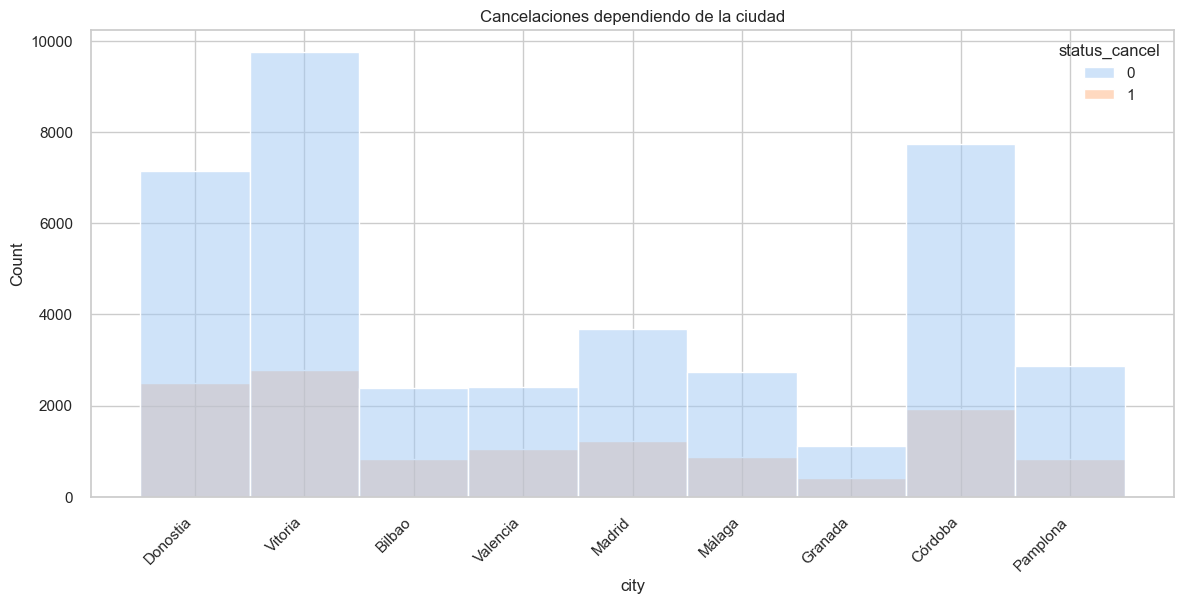

In [353]:
plt.figure(figsize=(12,6))  # Aumenta espacio horizontal
sns.histplot(df, x='city', hue='status_cancel')

plt.xticks(rotation=45, ha='right')  # Rota etiquetas para que no choquen
plt.tight_layout()  # Ajusta márgenes automáticamente
plt.title('Cancelaciones dependiendo de la ciudad')
plt.show()

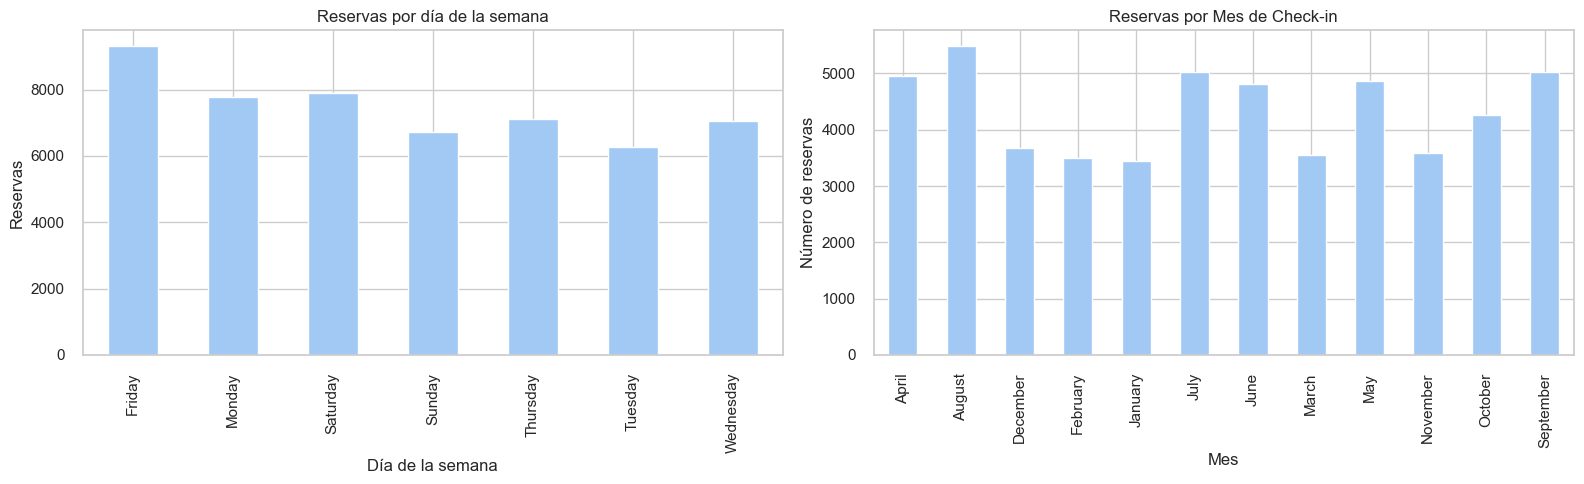

In [354]:
# Crear figura con 2 subplots (1 fila, 2 columnas)
plt.figure(figsize=(16,5))

# Subplot 1: Reservas por día de la semana
plt.subplot(1,2,1)
df["checkin_day"].value_counts().sort_index().plot(
    kind="bar"
)
plt.title("Reservas por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Reservas")

# Subplot 2: Reservas por mes de check-in
plt.subplot(1,2,2)
order = sorted(df["checkin_month"].dropna().unique())
df["checkin_month"].value_counts().loc[order].plot(
    kind="bar"
)
plt.title("Reservas por Mes de Check-in")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")

plt.tight_layout()
plt.show()

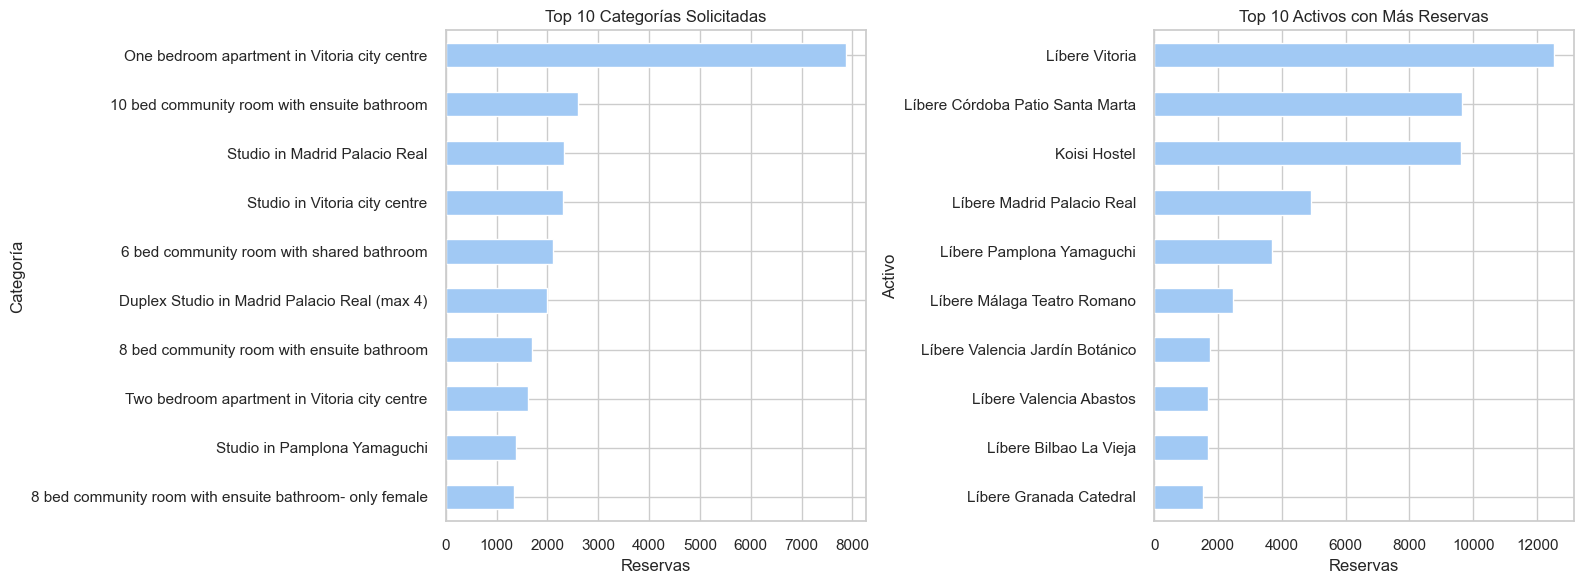

In [355]:

# Crear figura con 2 subplots (1 fila, 2 columnas)
plt.figure(figsize=(16,6))

# Subplot 1: Top 10 Categorías Solicitadas
plt.subplot(1,2,1)
df["requested_category_name"].value_counts().head(10).sort_values().plot(
    kind="barh"
   
)
plt.title("Top 10 Categorías Solicitadas")
plt.xlabel("Reservas")
plt.ylabel("Categoría")

# Subplot 2: Top 10 Activos con Más Reservas
plt.subplot(1,2,2)
df["asset"].value_counts().head(10).sort_values().plot(
    kind="barh"
)
plt.title("Top 10 Activos con Más Reservas")
plt.xlabel("Reservas")
plt.ylabel("Activo")

plt.tight_layout()
plt.show()


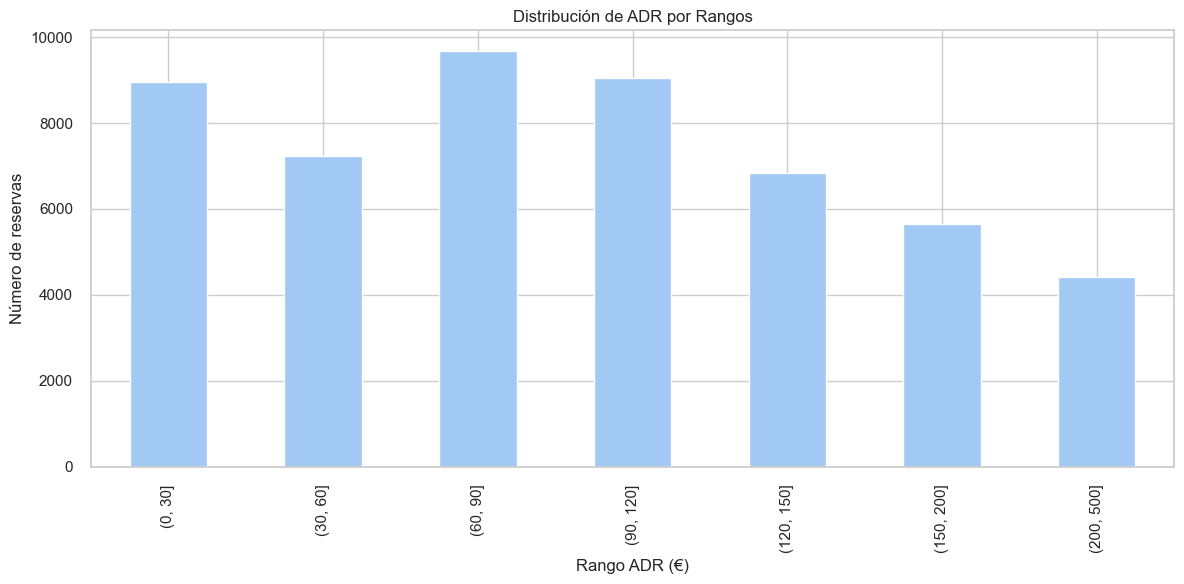

In [356]:
adr = df["total_adr"].clip(0, df["total_adr"].quantile(0.95))

ranges = pd.cut(adr, bins=[0,30,60,90,120,150,200,500])
ranges.value_counts().sort_index().plot(
    kind="bar"
)

plt.title("Distribución de ADR por Rangos")
plt.xlabel("Rango ADR (€)")
plt.ylabel("Número de reservas")
plt.tight_layout() 

plt.show()


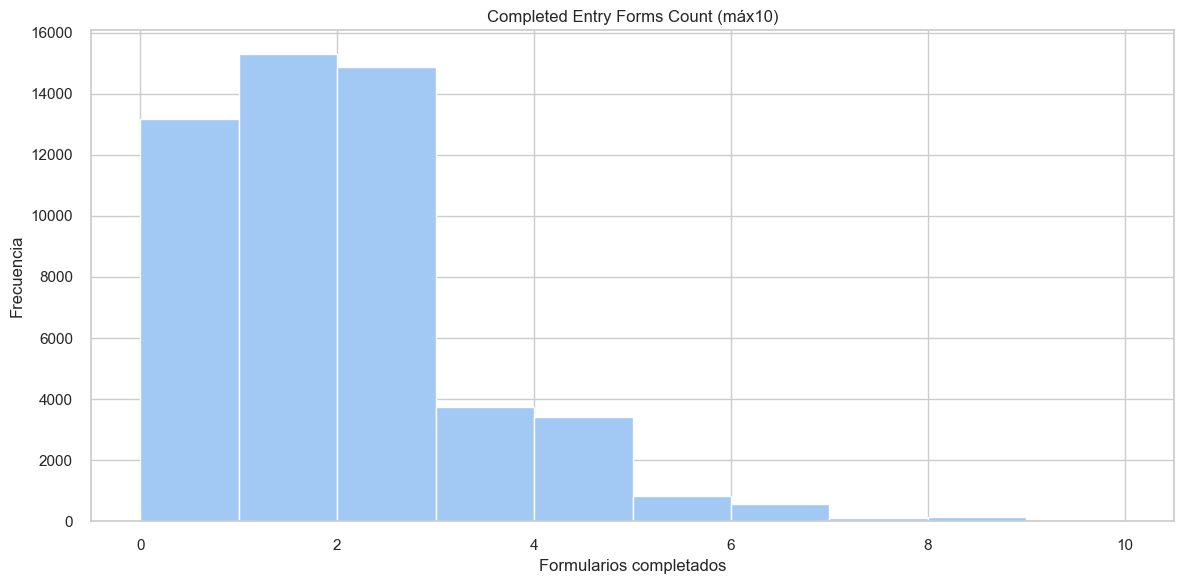

In [357]:
df["completed_entry_forms_count"].clip(0,10).plot.hist(
    bins=10
)

plt.title("Completed Entry Forms Count (máx10)")
plt.xlabel("Formularios completados")
plt.ylabel("Frecuencia")
plt.tight_layout() 

plt.show()


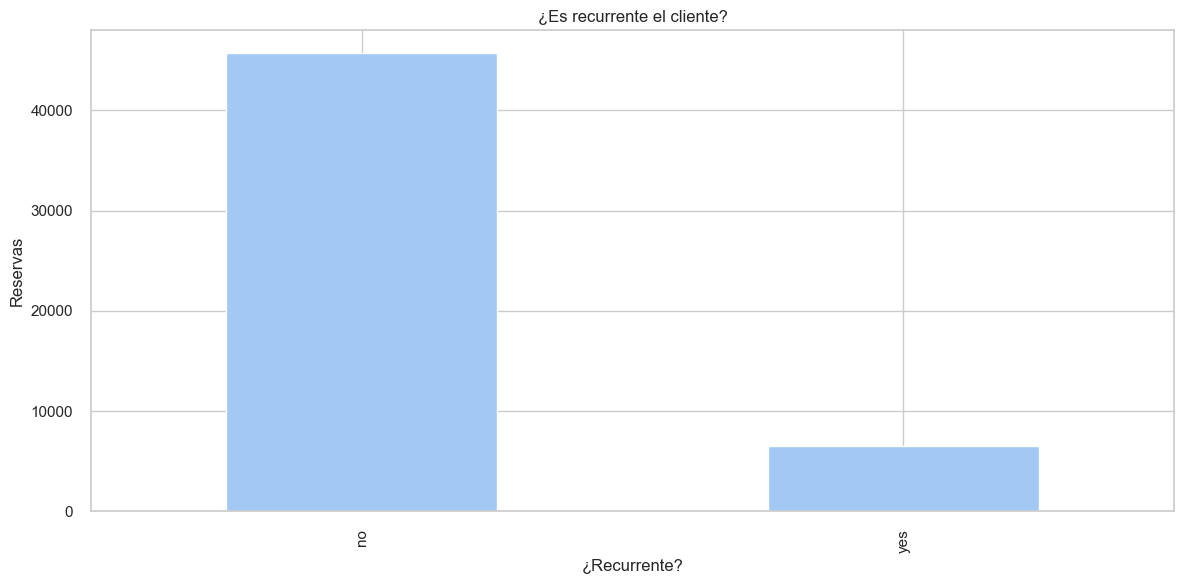

In [358]:
df["returning_inhabitant"].value_counts().plot(
    kind="bar"
)

plt.title("¿Es recurrente el cliente?")
plt.xlabel("¿Recurrente?")
plt.ylabel("Reservas")
plt.tight_layout() 

plt.show()


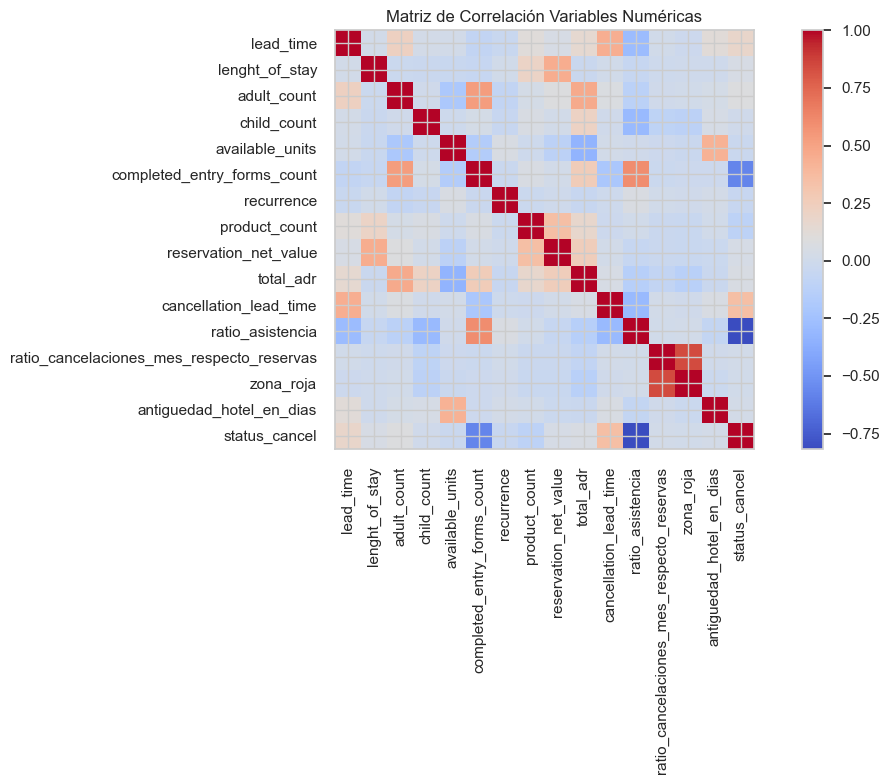

In [359]:
num_df = df.select_dtypes(include=["float64", "int64"])
corr = num_df.corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Matriz de Correlación Variables Numéricas")
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.tight_layout() 
plt.show()


ADICIONALES


C:\Users\garat\AppData\Local\Temp\ipykernel_22016\1941288495.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


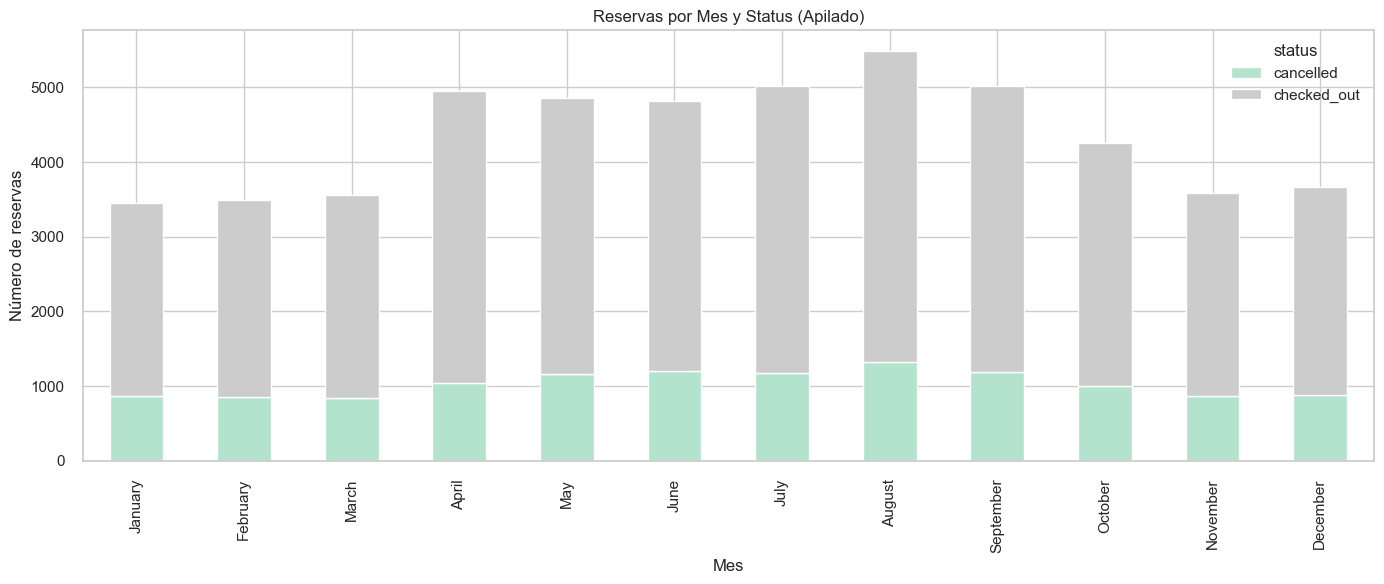

In [360]:
order_months = ["January","February","March","April","May","June",
                "July","August","September","October","November","December"]

df["checkin_month"] = pd.Categorical(df["checkin_month"], categories=order_months, ordered=True)

pivot = df.pivot_table(
    index="checkin_month",
    columns="status",
    values="reservation_net_value",
    aggfunc="count"
).fillna(0)

pivot.sort_index().plot(
    kind="bar",
    stacked=True,
    figsize=(14,6),
    colormap="Pastel2"
)

plt.title("Reservas por Mes y Status (Apilado)")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")
plt.tight_layout() 
plt.show()


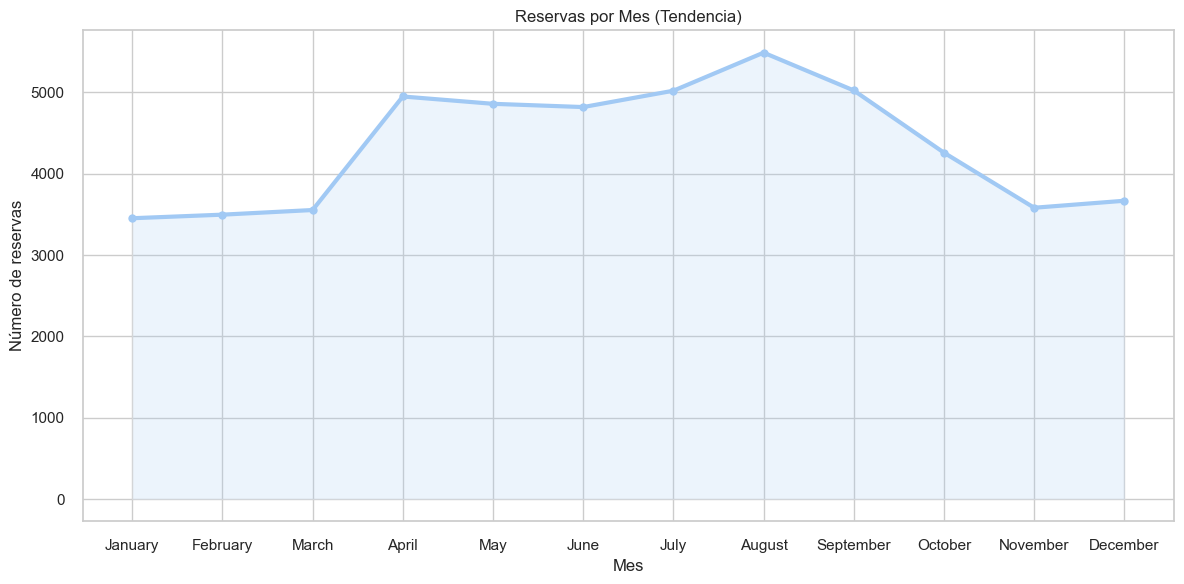

In [361]:
monthly = df["checkin_month"].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly.values, marker="o", linewidth=3)
plt.fill_between(monthly.index, monthly.values, alpha=0.2)

plt.title("Reservas por Mes (Tendencia)")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")
plt.tight_layout() 

plt.show()


<Figure size 1400x600 with 0 Axes>

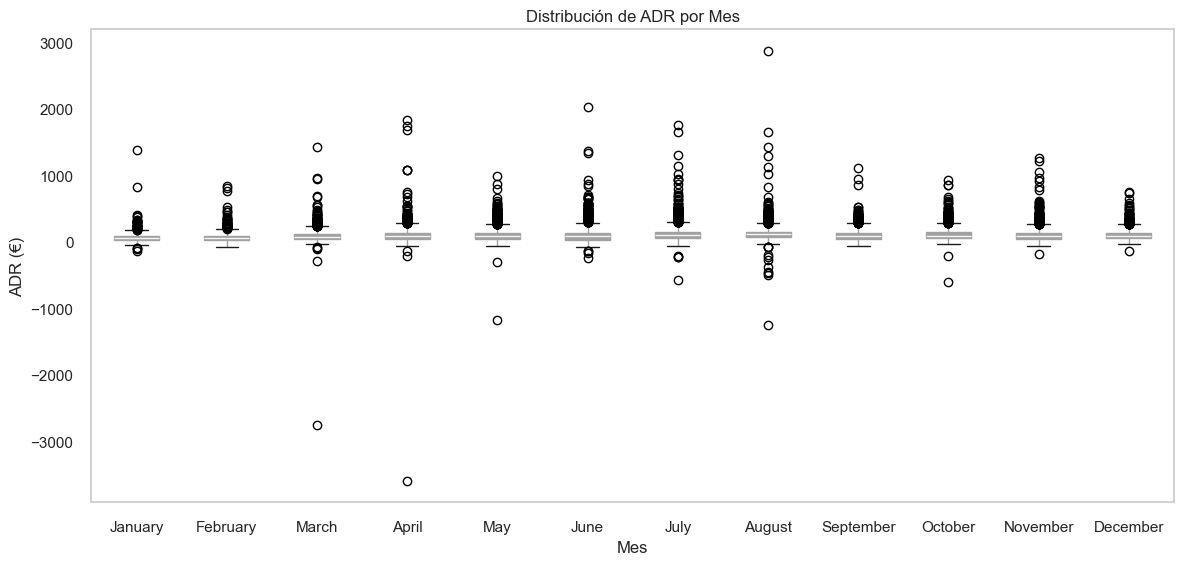

In [362]:
plt.figure(figsize=(14,6))

df.boxplot(
    column="total_adr",
    by="checkin_month",
    grid=False,
    patch_artist=True
)

plt.title("Distribución de ADR por Mes")
plt.suptitle("")
plt.xlabel("Mes")
plt.ylabel("ADR (€)")
plt.tight_layout() 

plt.show()


C:\Users\garat\AppData\Local\Temp\ipykernel_22016\2200858594.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_month = df.groupby("checkin_month").agg({


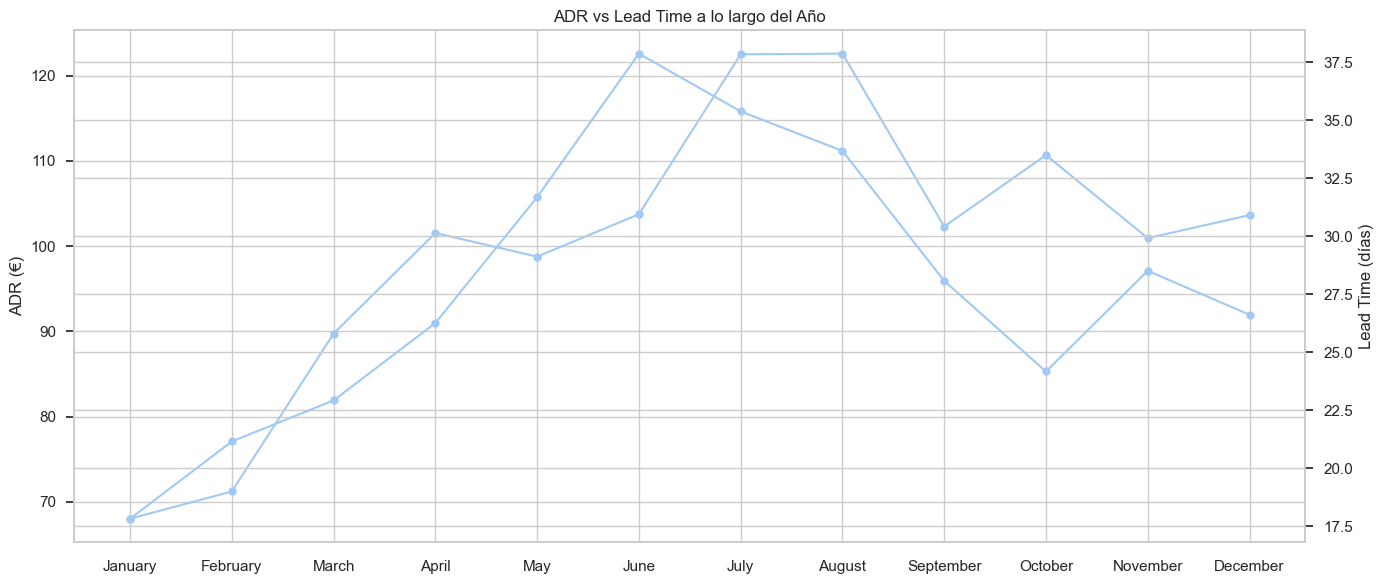

In [363]:
by_month = df.groupby("checkin_month").agg({
    "total_adr": "mean",
    "lead_time": "mean"
}).sort_index()

fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(by_month.index, by_month["total_adr"], marker="o", label="ADR")
ax1.set_ylabel("ADR (€)")

ax2 = ax1.twinx()
ax2.plot(by_month.index, by_month["lead_time"], marker="o", label="Lead Time")
ax2.set_ylabel("Lead Time (días)")

plt.title("ADR vs Lead Time a lo largo del Año")
plt.tight_layout() 
plt.show()


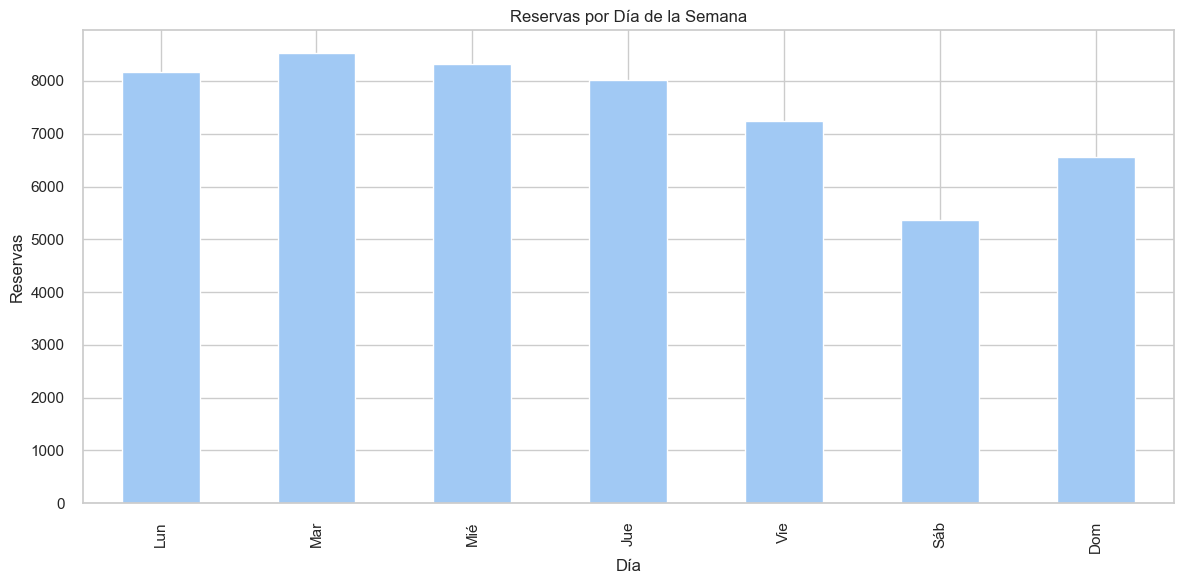

In [364]:
df["weekday"] = pd.to_datetime(df["booked_at"], errors='coerce').dt.dayofweek

df["weekday"].replace({
    0:"Lun",1:"Mar",2:"Mié",3:"Jue",4:"Vie",5:"Sáb",6:"Dom"
}).value_counts().loc[["Lun","Mar","Mié","Jue","Vie","Sáb","Dom"]].plot(
    kind="bar"
)

plt.title("Reservas por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("Reservas")
plt.tight_layout() 

plt.show()


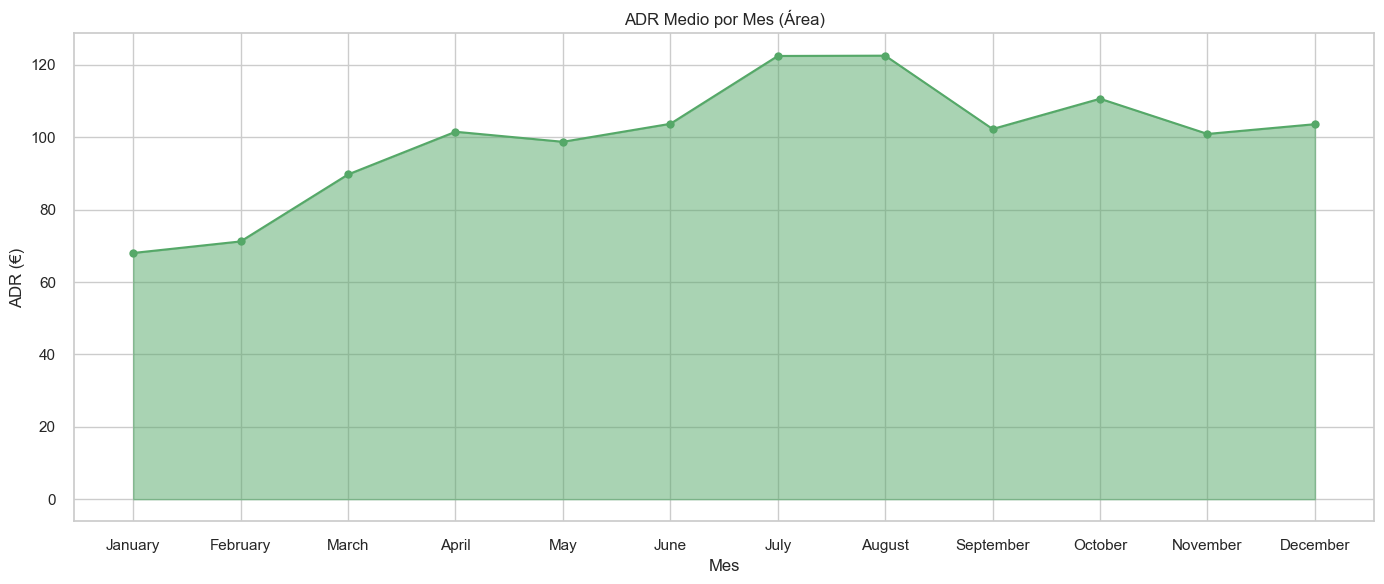

In [365]:
plt.figure(figsize=(14,6))

plt.fill_between(by_month.index, by_month["total_adr"], color="#55a868", alpha=0.5)
plt.plot(by_month.index, by_month["total_adr"], marker="o", color="#55a868")

plt.title("ADR Medio por Mes (Área)")
plt.xlabel("Mes")
plt.ylabel("ADR (€)")
plt.tight_layout() 

plt.show()


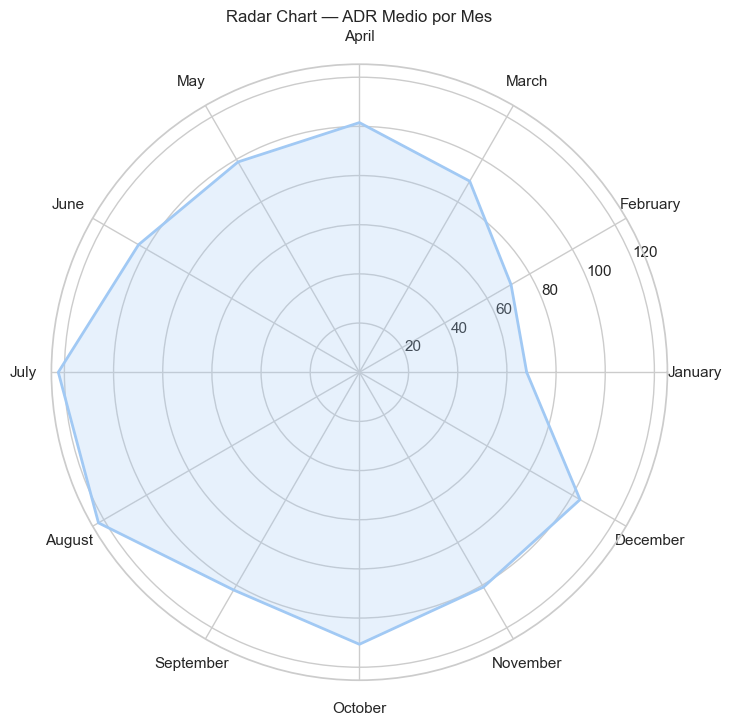

In [366]:
angles = np.linspace(0, 2*np.pi, len(by_month), endpoint=False)
values = by_month["total_adr"].values
values = np.concatenate((values, [values[0]]))
angles = np.concatenate((angles, [angles[0]]))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(by_month.index)

plt.title("Radar Chart — ADR Medio por Mes")
plt.show()


C:\Users\garat\AppData\Local\Temp\ipykernel_22016\2501589302.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_by_month = df.groupby("checkin_month")["status_cancel"].mean().sort_values()


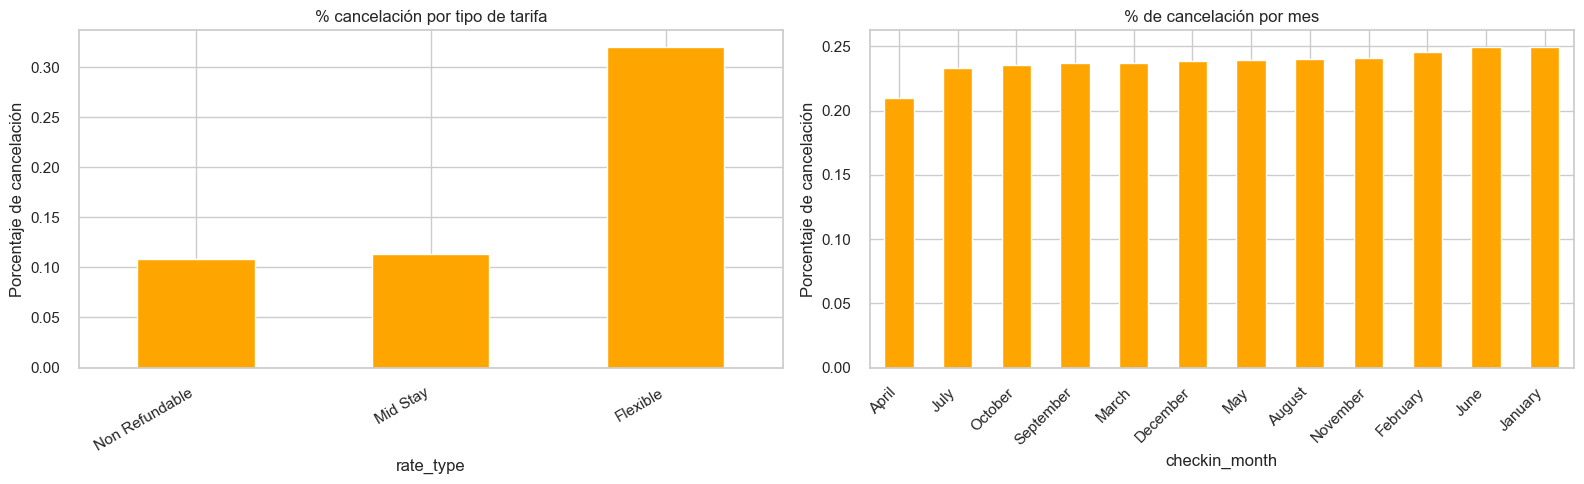

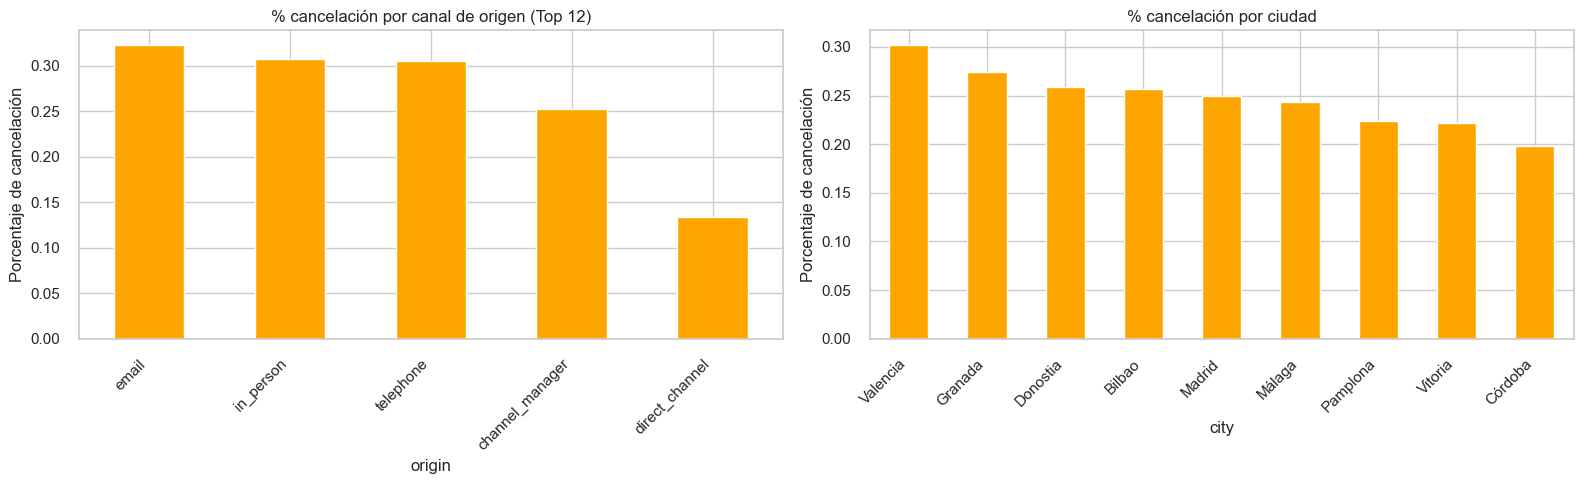

In [367]:


cancel_by_rate = df.groupby("rate_type")["status_cancel"].mean().sort_values()
cancel_by_month = df.groupby("checkin_month")["status_cancel"].mean().sort_values()

plt.figure(figsize=(16,5))

# Subplot 1: % cancelación por tipo de tarifa
plt.subplot(1,2,1)
cancel_by_rate.plot(kind="bar", color="orange")
plt.title("% cancelación por tipo de tarifa")
plt.ylabel("Porcentaje de cancelación")
plt.xticks(rotation=30, ha="right")

# Subplot 2: % de cancelación por mes
plt.subplot(1,2,2)
cancel_by_month.plot(kind="bar", color="orange")
plt.title("% de cancelación por mes")
plt.ylabel("Porcentaje de cancelación")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

# ----------------------------
# Figura 2: cancel_by_origin y cancel_by_city
# ----------------------------
cancel_by_origin = (
    df.groupby("origin")["status_cancel"]
    .mean()
    .sort_values(ascending=False)
    .head(12)
)
cancel_by_city = df.groupby("city")["status_cancel"].mean().sort_values(ascending=False)

plt.figure(figsize=(16,5))

# Subplot 1: % cancelación por canal de origen (Top 12)
plt.subplot(1,2,1)
cancel_by_origin.plot(kind="bar", color="orange")
plt.title("% cancelación por canal de origen (Top 12)")
plt.ylabel("Porcentaje de cancelación")
plt.xticks(rotation=45, ha="right")

# Subplot 2: % cancelación por ciudad
plt.subplot(1,2,2)
cancel_by_city.plot(kind="bar", color="orange")
plt.title("% cancelación por ciudad")
plt.ylabel("Porcentaje de cancelación")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


In [368]:
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,ratio_cancelaciones_mes_respecto_reservas,zona_roja,estacion_estancia,estacion_reserva,antiguedad_hotel_en_dias,es_festivo,es_finde,city,status_cancel,weekday
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,0.251273,1,invierno,otoño,2110,False,False,Donostia,0,5
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,0.251273,1,invierno,invierno,2110,True,False,Donostia,0,2
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,0.251273,1,invierno,otoño,2110,True,False,Donostia,0,2
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,0.251273,1,invierno,otoño,2110,False,False,Donostia,0,5
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,0.251273,1,invierno,otoño,2110,False,False,Donostia,0,1


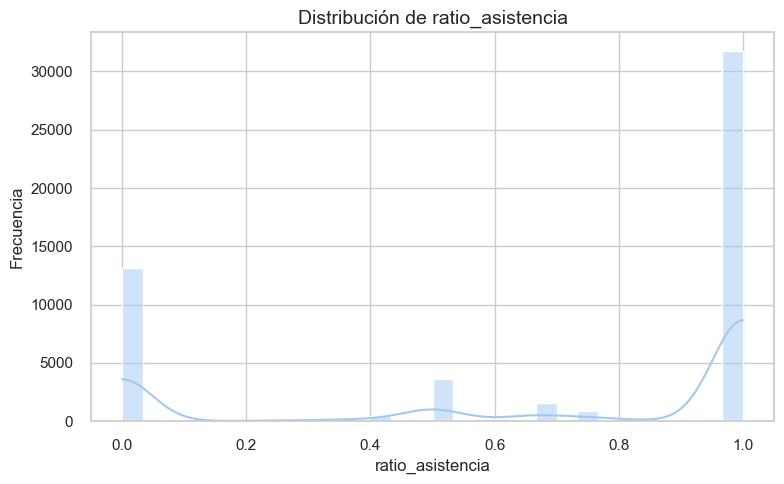

In [369]:
plt.figure(figsize=(8,5))
sns.histplot(df["ratio_asistencia"], bins=30, kde=True)
plt.title("Distribución de ratio_asistencia", fontsize=14)
plt.xlabel("ratio_asistencia")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


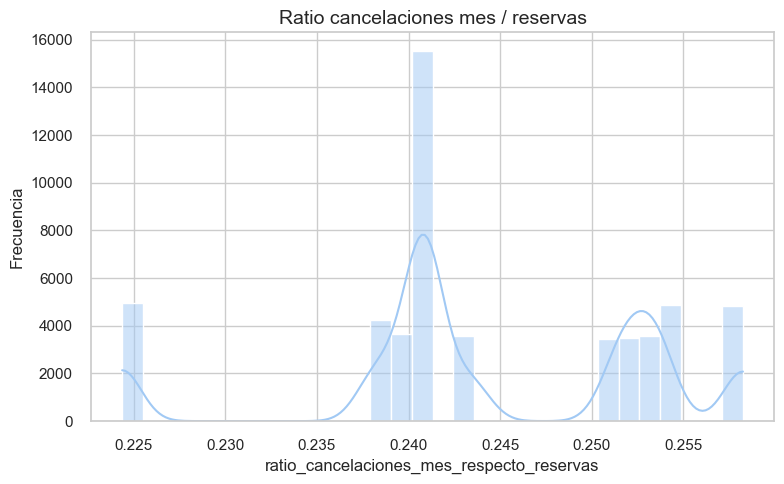

In [370]:
plt.figure(figsize=(8,5))
sns.histplot(df["ratio_cancelaciones_mes_respecto_reservas"], bins=30, kde=True)
plt.title("Ratio cancelaciones mes / reservas", fontsize=14)
plt.xlabel("ratio_cancelaciones_mes_respecto_reservas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


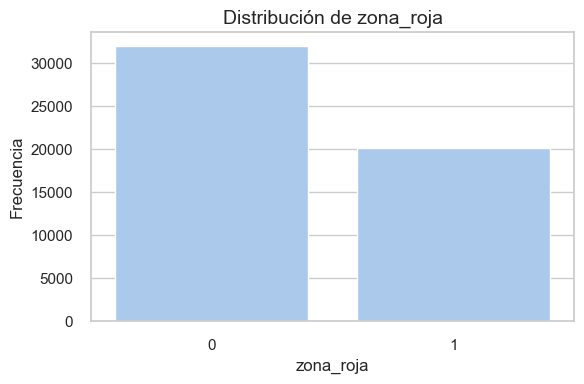

In [371]:
plt.figure(figsize=(6,4))
order = df["zona_roja"].value_counts().index
sns.countplot(x=df["zona_roja"], order=order)
plt.title("Distribución de zona_roja", fontsize=14)
plt.xlabel("zona_roja")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


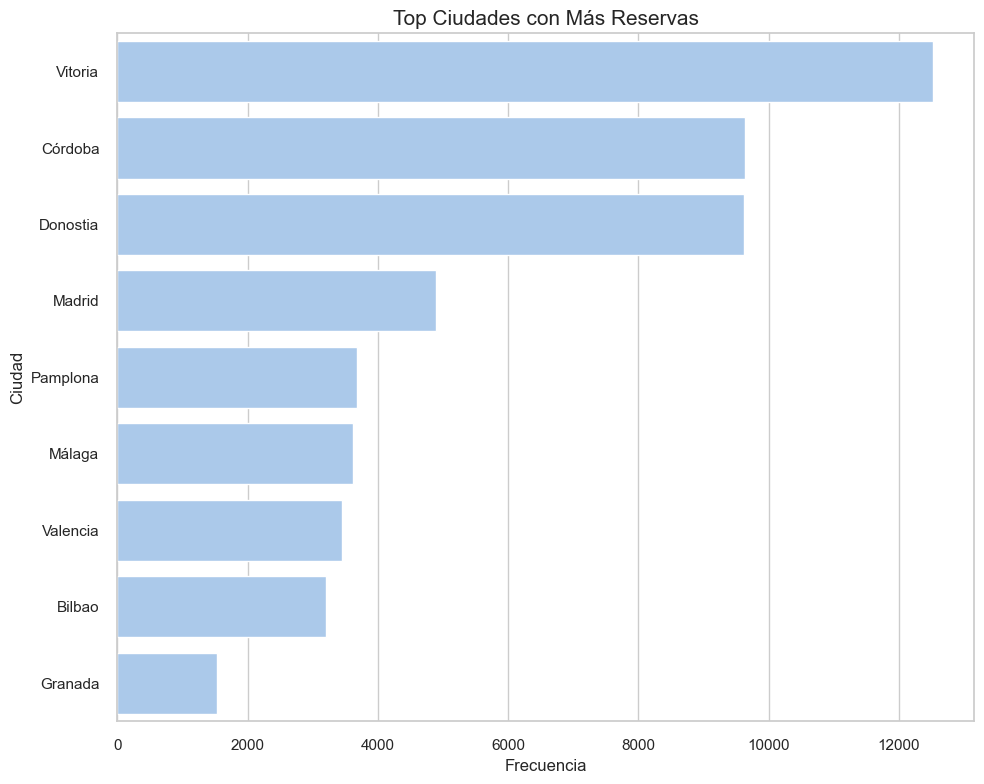

In [372]:
plt.figure(figsize=(10,8))
top_cities = df["city"].value_counts().head(20)

sns.barplot(
    y=top_cities.index,
    x=top_cities.values
)

plt.title("Top Ciudades con Más Reservas", fontsize=15)
plt.xlabel("Frecuencia")
plt.ylabel("Ciudad")
plt.tight_layout()
plt.show()


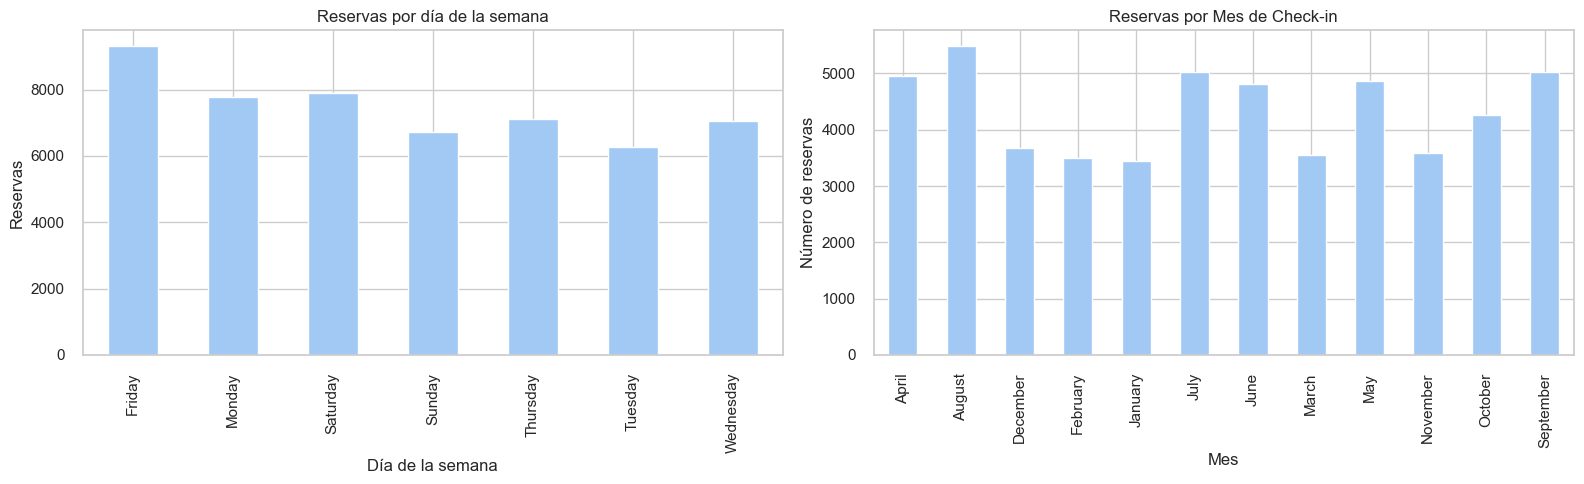

In [373]:
# Crear figura con 2 subplots (1 fila, 2 columnas)
plt.figure(figsize=(16,5))

# Subplot 1: Reservas por día de la semana
plt.subplot(1,2,1)
df["checkin_day"].value_counts().sort_index().plot(
    kind="bar"
)
plt.title("Reservas por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Reservas")

# Subplot 2: Reservas por mes de check-in
plt.subplot(1,2,2)
order = sorted(df["checkin_month"].dropna().unique())
df["checkin_month"].value_counts().loc[order].plot(
    kind="bar"
)
plt.title("Reservas por Mes de Check-in")
plt.xlabel("Mes")
plt.ylabel("Número de reservas")

plt.tight_layout()
plt.show()

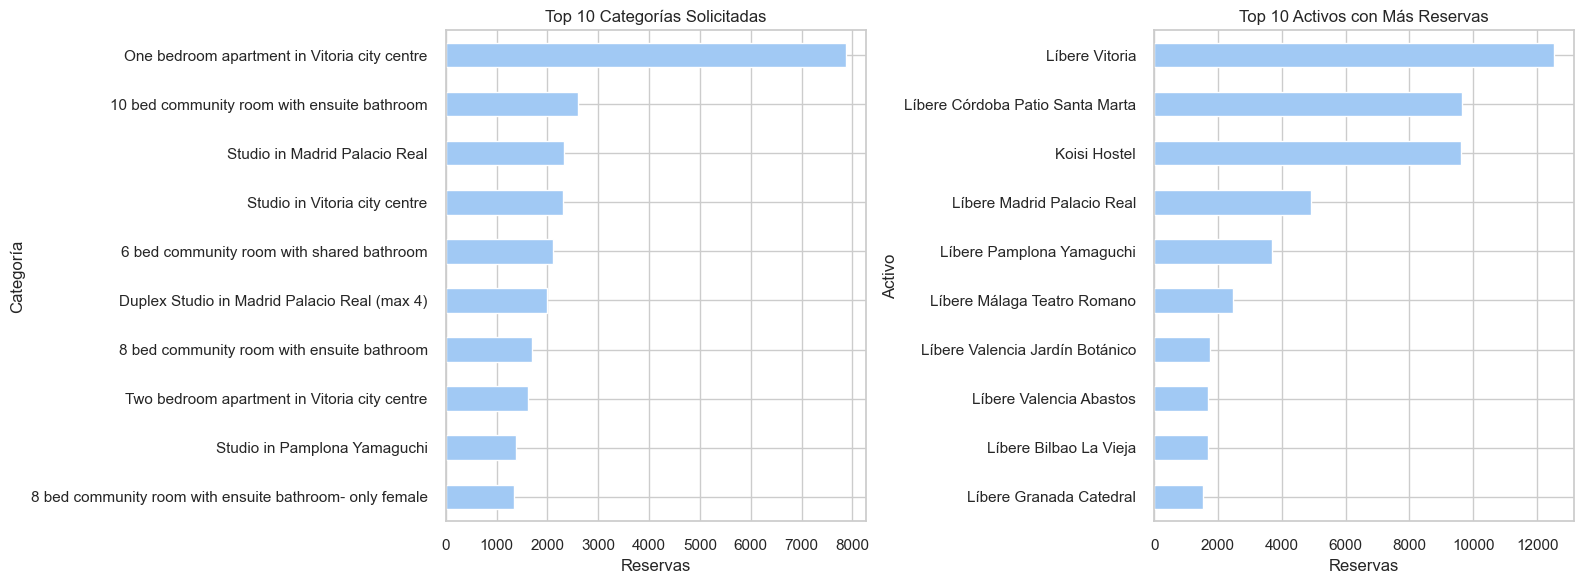

In [374]:

# Crear figura con 2 subplots (1 fila, 2 columnas)
plt.figure(figsize=(16,6))

# Subplot 1: Top 10 Categorías Solicitadas
plt.subplot(1,2,1)
df["requested_category_name"].value_counts().head(10).sort_values().plot(
    kind="barh"
)
plt.title("Top 10 Categorías Solicitadas")
plt.xlabel("Reservas")
plt.ylabel("Categoría")

# Subplot 2: Top 10 Activos con Más Reservas
plt.subplot(1,2,2)
df["asset"].value_counts().head(10).sort_values().plot(
    kind="barh"
)
plt.title("Top 10 Activos con Más Reservas")
plt.xlabel("Reservas")
plt.ylabel("Activo")

plt.tight_layout()
plt.show()


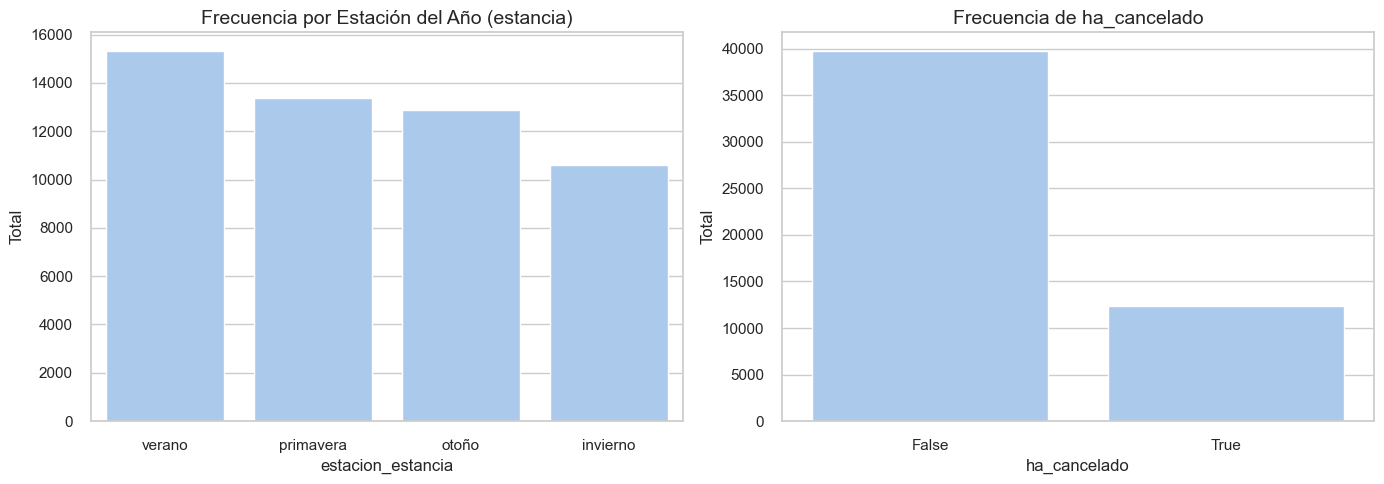

In [375]:


# Crear figura con 2 subplots
plt.figure(figsize=(14,5))

# Subplot 1: Frecuencia por Estación del Año de estancia
plt.subplot(1,2,1)
order = df["estacion_estancia"].value_counts().index
sns.countplot(x=df["estacion_estancia"], order=order)
plt.title("Frecuencia por Estación del Año (estancia)", fontsize=14)
plt.xlabel("estacion_estancia")
plt.ylabel("Total")

# Subplot 2: Frecuencia de ha_cancelado
plt.subplot(1,2,2)
sns.countplot(x=df["ha_cancelado"])
plt.title("Frecuencia de ha_cancelado", fontsize=14)
plt.xlabel("ha_cancelado")
plt.ylabel("Total")

plt.tight_layout()
plt.show()


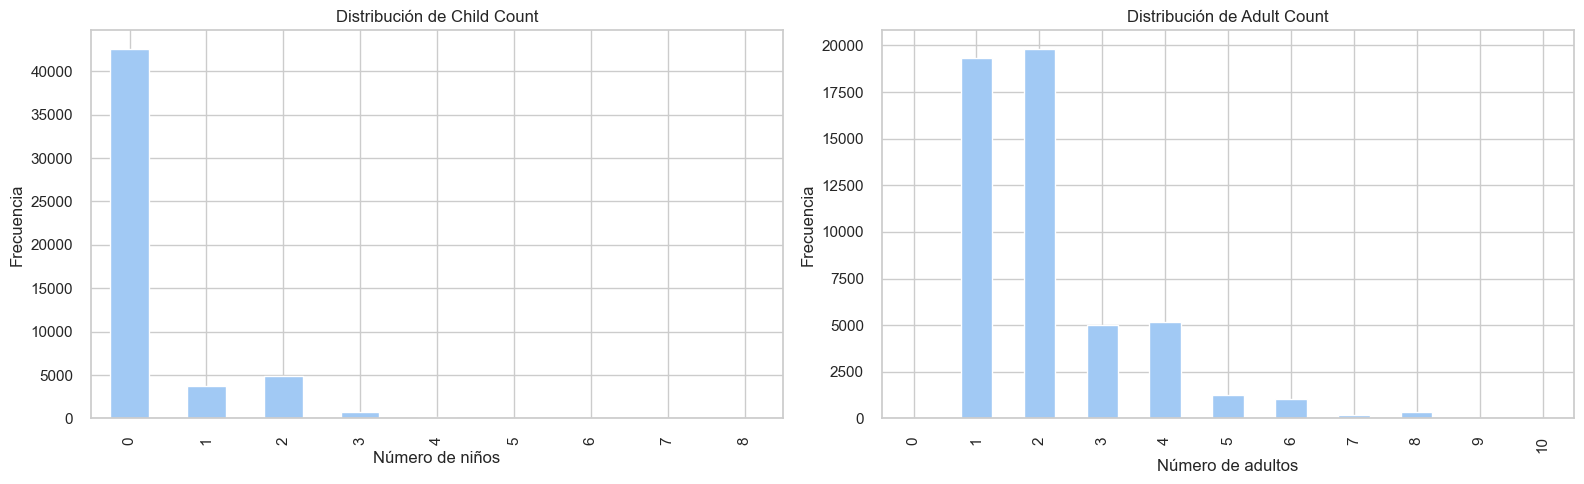

In [376]:

# Crear figura con 2 subplots (1 fila, 2 columnas)
plt.figure(figsize=(16,5))

# Subplot 1: Child Count
plt.subplot(1,2,1)
df["child_count"].value_counts().sort_index().plot(
    kind="bar"
)
plt.title("Distribución de Child Count")
plt.xlabel("Número de niños")
plt.ylabel("Frecuencia")

# Subplot 2: Adult Count
plt.subplot(1,2,2)
df["adult_count"].value_counts().sort_index().plot(
    kind="bar"
)
plt.title("Distribución de Adult Count")
plt.xlabel("Número de adultos")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


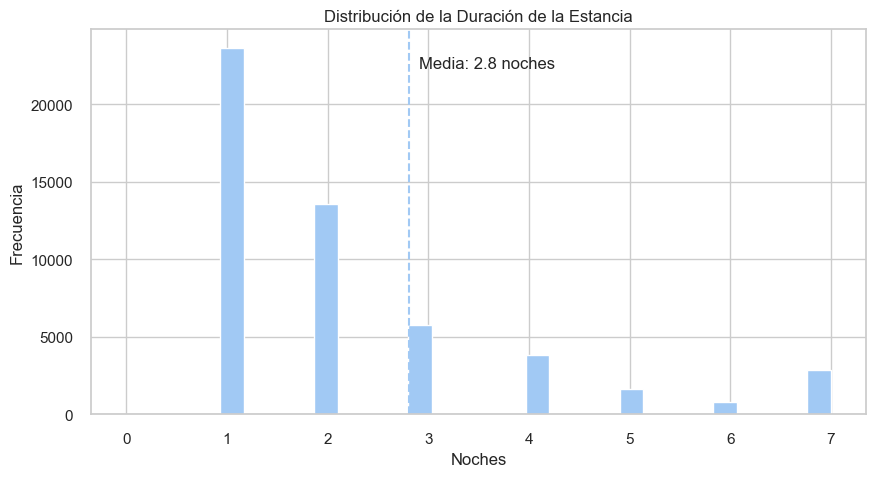

In [377]:
plt.figure(figsize=(10,5))

stay = df["lenght_of_stay"]

plt.hist(
    stay.clip(0, stay.quantile(0.95)),
    bins=30
)

mean_stay = stay.mean()

plt.axvline(mean_stay, linestyle="--")

plt.text(
    mean_stay + 0.1,
    plt.ylim()[1]*0.9,
    f"Media: {mean_stay:.1f} noches"
)

plt.title("Distribución de la Duración de la Estancia")
plt.xlabel("Noches")
plt.ylabel("Frecuencia")

plt.show()


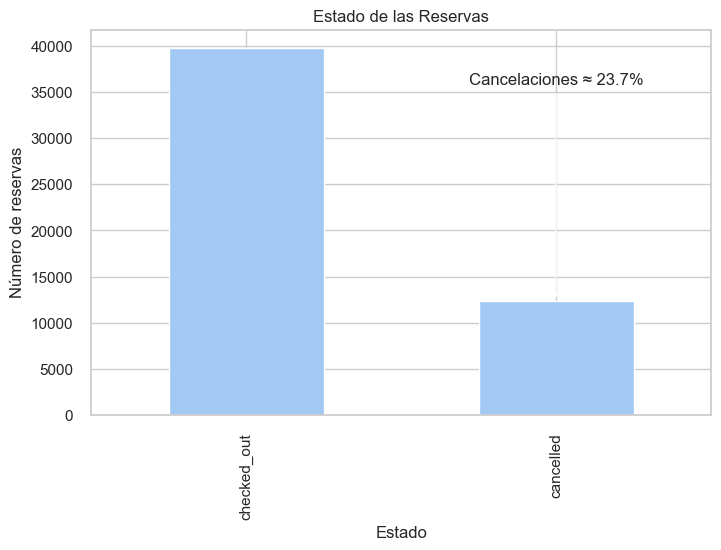

In [378]:
plt.figure(figsize=(8,5))

counts = df["status"].value_counts()
counts.plot(kind="bar")

cancel_pct = counts.get("cancelled", 0) / counts.sum() * 100

plt.annotate(
    f"Cancelaciones ≈ {cancel_pct:.1f}%",
    xy=(counts.index.get_loc("cancelled"), counts["cancelled"]),
    xytext=(counts.index.get_loc("cancelled"), counts.max()*0.9),
    ha="center",
    arrowprops=dict(arrowstyle="->")
)

plt.title("Estado de las Reservas")
plt.xlabel("Estado")
plt.ylabel("Número de reservas")
plt.show()


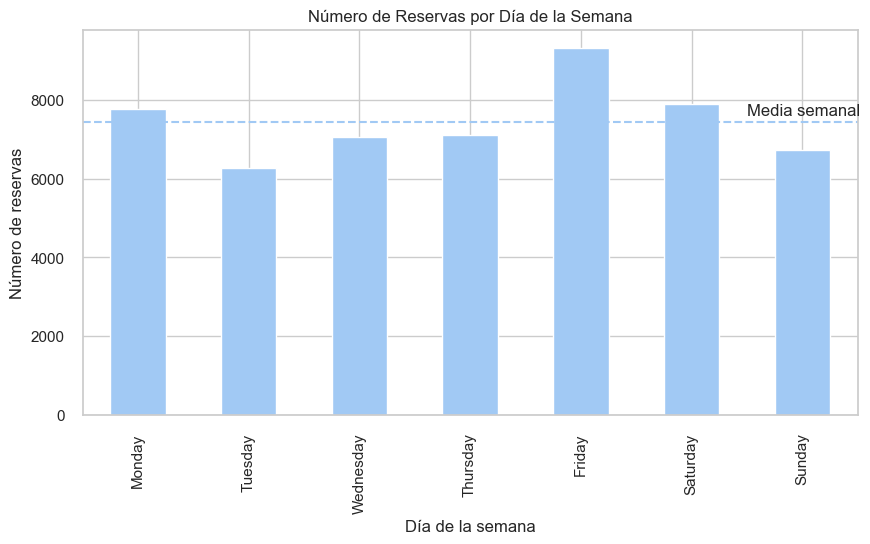

In [379]:
order_days = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

counts = df["checkin_day"].value_counts().reindex(order_days)

plt.figure(figsize=(10,5))
counts.plot(kind="bar")

mean_day = counts.mean()
plt.axhline(mean_day, linestyle="--")

plt.text(
    5.5,
    mean_day * 1.02,
    "Media semanal",
)

plt.title("Número de Reservas por Día de la Semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de reservas")
plt.show()


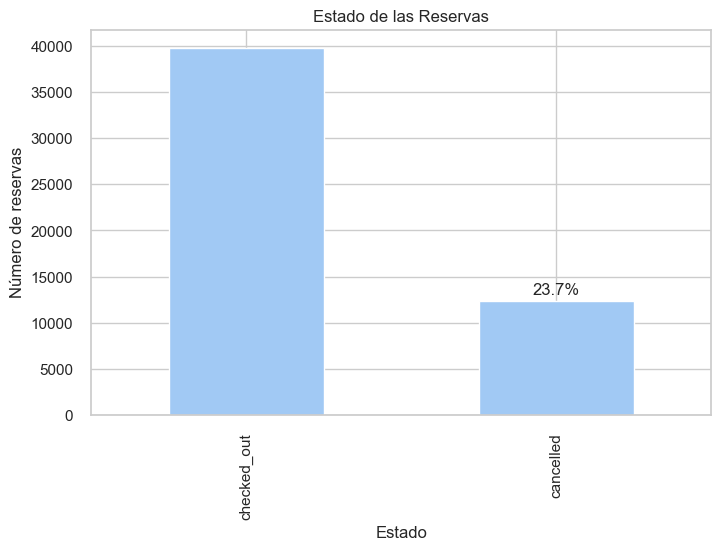

In [380]:
status_counts = df["status"].value_counts()
status_pct = status_counts / status_counts.sum() * 100

plt.figure(figsize=(8,5))
status_counts.plot(kind="bar")

cancel_pct = status_pct.get("cancelled", 0)

plt.text(
    status_counts.index.get_loc("cancelled"),
    status_counts["cancelled"] * 1.05,
    f"{cancel_pct:.1f}%",
    ha="center"
)

plt.title("Estado de las Reservas")
plt.xlabel("Estado")
plt.ylabel("Número de reservas")
plt.show()


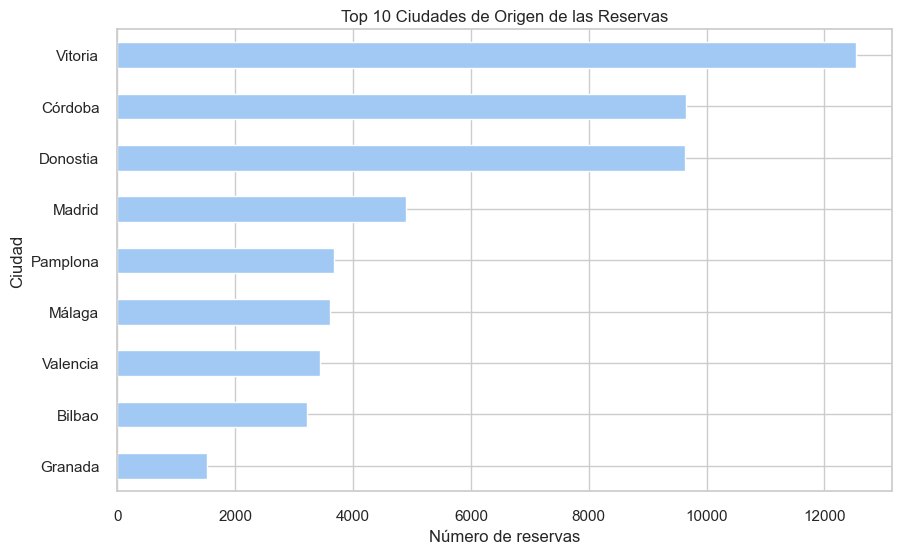

In [381]:
top_cities = df["city"].value_counts().head(10).sort_values()

plt.figure(figsize=(10,6))
top_cities.plot(kind="barh")

plt.title("Top 10 Ciudades de Origen de las Reservas")
plt.xlabel("Número de reservas")
plt.ylabel("Ciudad")

plt.show()


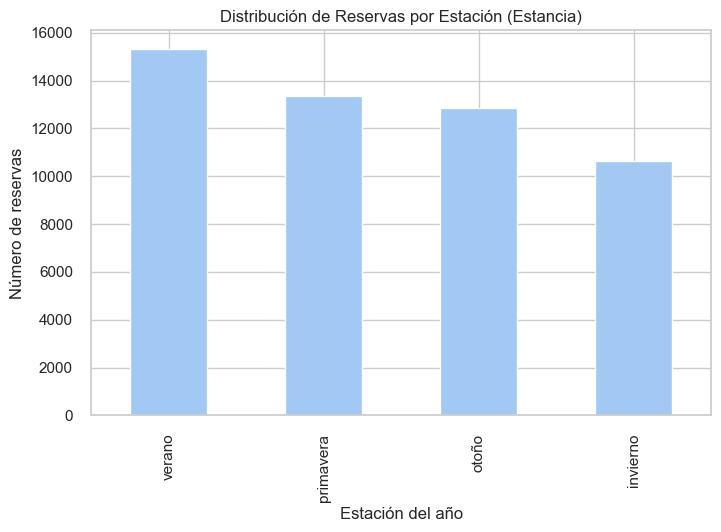

In [382]:
season_counts = df["estacion_estancia"].value_counts()

plt.figure(figsize=(8,5))
season_counts.plot(kind="bar")

plt.title("Distribución de Reservas por Estación (Estancia)")
plt.xlabel("Estación del año")
plt.ylabel("Número de reservas")

plt.show()


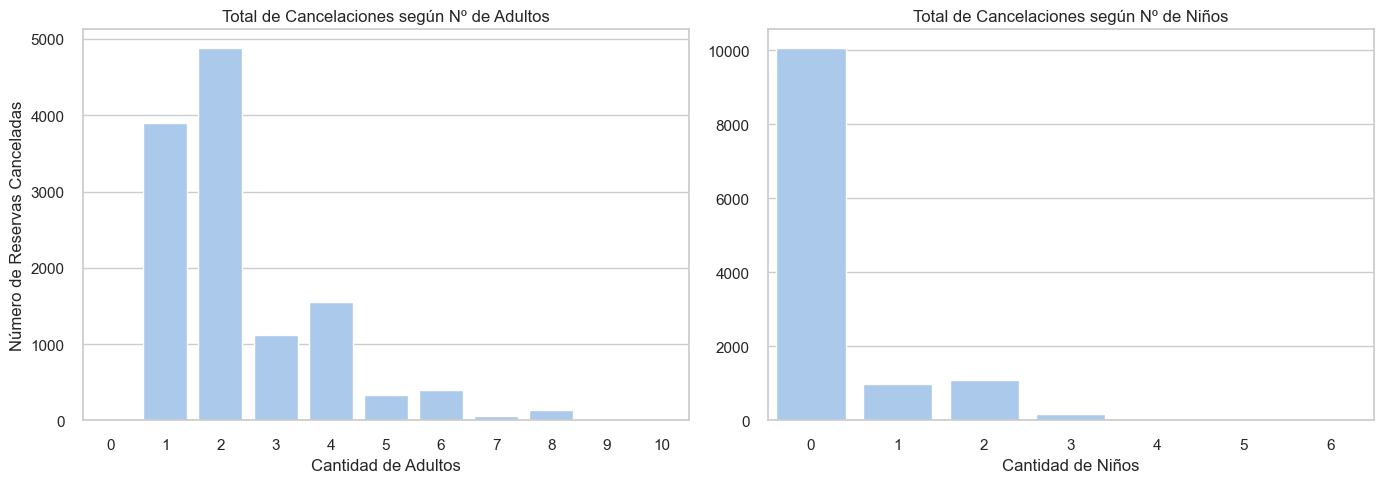

In [384]:

df_canceladas = df[df['status'] == 'cancelled'].copy()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.set_style("whitegrid")

# --- GRÁFICO 1: ADULTOS ---
sns.countplot(data=df_canceladas, x='adult_count', ax=axes[0])
axes[0].set_title('Total de Cancelaciones según Nº de Adultos')
axes[0].set_xlabel('Cantidad de Adultos')
axes[0].set_ylabel('Número de Reservas Canceladas')

# --- GRÁFICO 2: NIÑOS ---
sns.countplot(data=df_canceladas, x='child_count', ax=axes[1])
axes[1].set_title('Total de Cancelaciones según Nº de Niños')
axes[1].set_xlabel('Cantidad de Niños')
axes[1].set_ylabel('') 

plt.tight_layout()
plt.show()

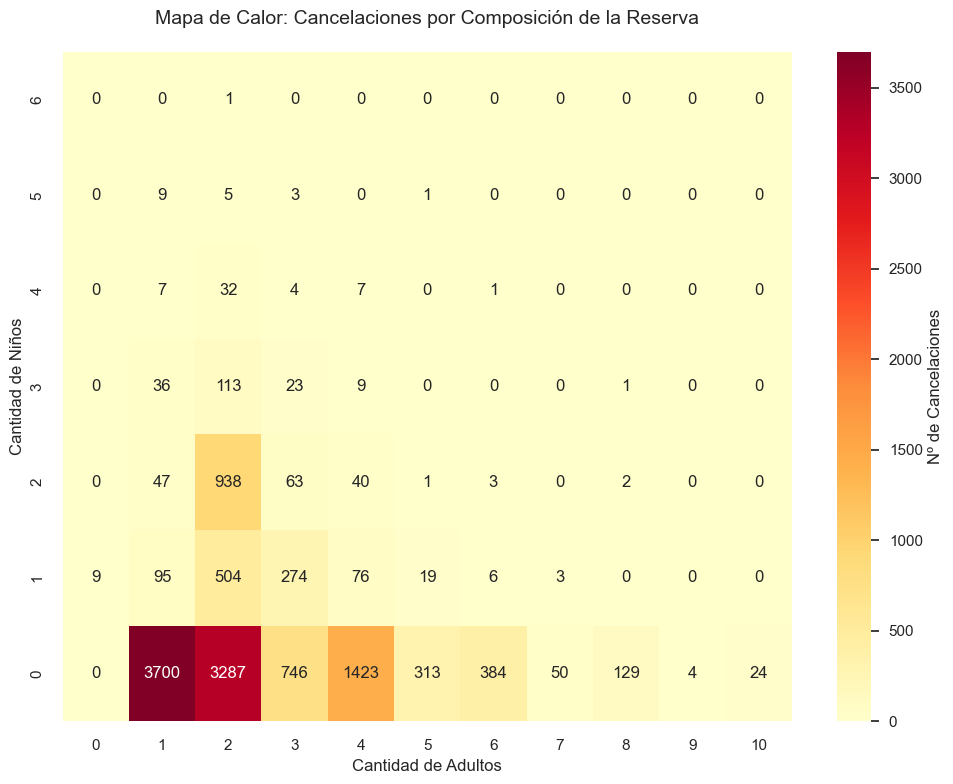

In [385]:
tabla_pivot = df_canceladas.groupby(['child_count', 'adult_count']).size().unstack(fill_value=0)

# 3. Dibujar el Mapa de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(tabla_pivot, 
            annot=True,      # Muestra el número exacto dentro de cada cuadro
            fmt='d',         # Formato de número entero
            cmap='YlOrRd',   # Color de amarillo a rojo (más rojo = más cancelaciones)
            cbar_kws={'label': 'Nº de Cancelaciones'})

plt.title('Mapa de Calor: Cancelaciones por Composición de la Reserva', fontsize=14, pad=20)
plt.xlabel('Cantidad de Adultos', fontsize=12)
plt.ylabel('Cantidad de Niños', fontsize=12)

# Invertir el eje Y para que el 0 empiece abajo
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

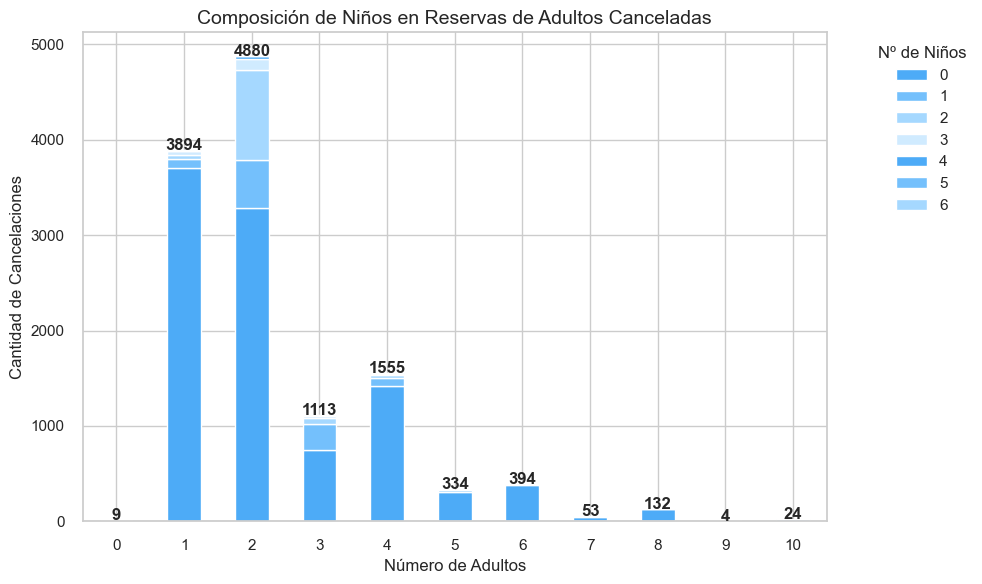

In [387]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar y filtrar
df = pd.read_csv('df_limpio.csv')
df_canceladas = df[df['status'] == 'cancelled'].copy()

# 2. Crear una tabla cruzada (Crosstab)
# Esto prepara los datos: Filas (Adultos) y Columnas (Niños)
resumen = pd.crosstab(df_canceladas['adult_count'], df_canceladas['child_count'])

# 3. Dibujar el gráfico de barras apiladas
ax = resumen.plot(kind='bar', 
                  stacked=True, 
                  figsize=(10, 6), 
                  color=['#4dabf7', '#74c0fc', '#a5d8ff', '#d0ebff']) # Tonos de azul

# 4. Personalización sencilla
plt.title('Composición de Niños en Reservas de Adultos Canceladas', fontsize=14)
plt.xlabel('Número de Adultos', fontsize=12)
plt.ylabel('Cantidad de Cancelaciones', fontsize=12)
plt.xticks(rotation=0) # Para que los números de adultos se lean en horizontal
plt.legend(title='Nº de Niños', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir el total encima de cada barra para mayor claridad
for rect in ax.patches:
    height = rect.get_height()
    if height > 0:
        # Calculamos la posición del texto (al final sumaremos los totales por grupo)
        pass 

# Truco para poner el total de la columna arriba
totales = resumen.sum(axis=1)
for i, total in enumerate(totales):
    ax.text(i, total + 0.5, str(int(total)), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

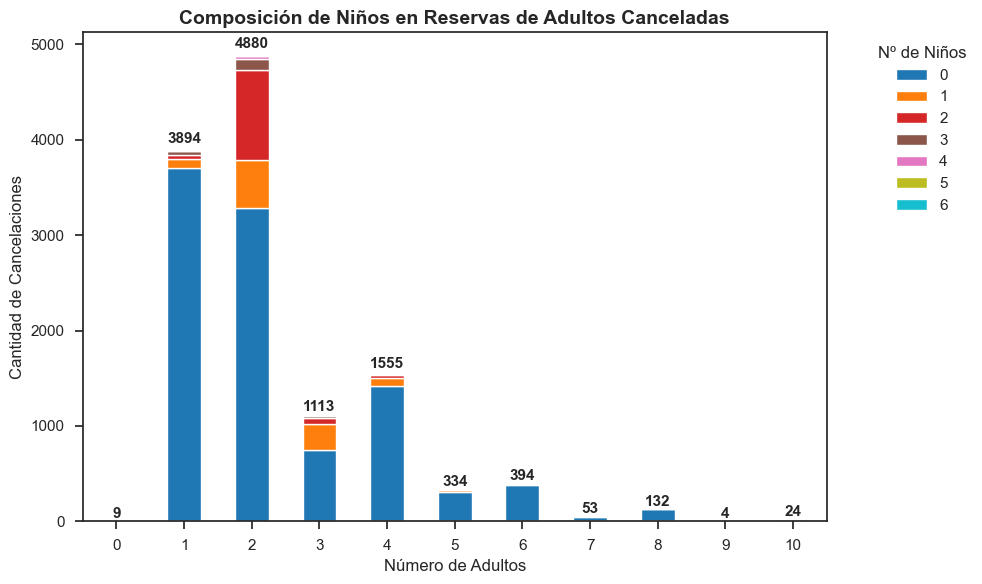

In [389]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar y filtrar
df = pd.read_csv('df_limpio.csv')
# Usamos 'cancelled' que es el término en tu CSV
df_canceladas = df[df['status'] == 'cancelled'].copy()

# 2. Crear la tabla cruzada
resumen = pd.crosstab(df_canceladas['adult_count'], df_canceladas['child_count'])

# 3. Dibujar el gráfico con colores de alto contraste (paleta 'tab10' o 'Set1')
# 'tab10' tiene colores muy distintos: azul, naranja, verde, rojo, lila...
ax = resumen.plot(kind='bar', 
                  stacked=True, 
                  figsize=(10, 6), 
                  colormap='tab10', 
                  edgecolor='white') # Añadimos borde blanco para separar los bloques

# 4. Personalización
plt.title('Composición de Niños en Reservas de Adultos Canceladas', fontsize=14, fontweight='bold')
plt.xlabel('Número de Adultos', fontsize=12)
plt.ylabel('Cantidad de Cancelaciones', fontsize=12)
plt.xticks(rotation=0) 

# Leyenda fuera del gráfico para que no tape nada
plt.legend(title='Nº de Niños', bbox_to_anchor=(1.05, 1), loc='upper left')

# 5. Poner el total de la columna arriba en negrita
totales = resumen.sum(axis=1)
for i, total in enumerate(totales):
    if total > 0:
        ax.text(i, total + (total * 0.01), str(int(total)), 
                ha='center', va='bottom', fontweight='bold', fontsize=11)

# Limpiar el diseño
plt.tight_layout()
plt.show()